In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Testing normality with Kolmogorov-Smirnov visually

The KS test is used to contrast goodness-of-fit hypotheses with a quantitative variable. It is based on the comparison of two distribution functions, one empirical, estimated from the collected data, and one theoretical. The theoretical distribution is the one we want to use to test the hypothesis. It is usually a normal distribution function. It represents the cumulative probabilities that would be expected from the scores of the variable if it were really normally distributed.

The statistic that quantifies how much the two distributions "look alike" is $D_{KS}$, which represents the maximum difference found between the points of both cumulative probability distributions $D_{KS}=max\;|D_i|=max\;|F(Y_i)-F_0(Y_i)|$. This statistic has a sample distribution associated with it, so we can calculate the probability of finding a maximum difference like the one actually obtained, or more extreme, given the null hypothesis that the variable is normally distributed (with the parameters we provide)


Although the information provided by this test is very useful, it happens that with large samples, small deviations from normality can be statistically significant, leading us to think that the variable analyzed is nothing like normal. Having a graphic support can be very convenient in these cases, as it can help us to nuance our conclusions. 

Next, I present a way in which the procedure carried out in a 'hidden' way by the KS test could be visualized to provide support for decision making.

#### The sample of data on which we are going to perform the KS test for normality

In [2]:
Yi=np.array([1.48,1.8,1.93,1.98,2.04,2.08,2.18,2.2,2.3,2.45,2.47,3.15,3.46,4.64]) # data from Pardo & Ruiz (2015) pp.68
Yi

array([1.48, 1.8 , 1.93, 1.98, 2.04, 2.08, 2.18, 2.2 , 2.3 , 2.45, 2.47,
       3.15, 3.46, 4.64])

#### How to get the empirical cumulative distribution function $F(Y_i)$?

- Sort scores in ascending order
- The cumulative prob up to one value $Y_i$ is $F(Y_i)=\frac{i}{n}$ where $i$ is the position each value $Y_i$ occupies in sorted array and $n$ is the sample size

In [3]:
sorted_Yi=np.sort(Yi) 
display(sorted_Yi)

emp_cdf=np.arange(start=1,stop=len(Yi)+1)/(len(Yi)) #len +1 because the stop value is not inclusive
display(emp_cdf)

array([1.48, 1.8 , 1.93, 1.98, 2.04, 2.08, 2.18, 2.2 , 2.3 , 2.45, 2.47,
       3.15, 3.46, 4.64])

array([0.07142857, 0.14285714, 0.21428571, 0.28571429, 0.35714286,
       0.42857143, 0.5       , 0.57142857, 0.64285714, 0.71428571,
       0.78571429, 0.85714286, 0.92857143, 1.        ])

#### How to get the theoretical cumulative distribution function $F_0(Y_i)$?

- Just compute the corresponding cumulative probability in the normal distribution (with the specified parameters) of the observed values $Y_i$

In [4]:
theor_cdf=norm.cdf(Yi,loc=2.5,scale=1)
theor_cdf

array([0.15386423, 0.24196365, 0.28433885, 0.30153179, 0.32275811,
       0.33724273, 0.37448417, 0.38208858, 0.42074029, 0.48006119,
       0.48803353, 0.74215389, 0.83147239, 0.98382262])

#### How we calculate the KS statistic $D_{KS}$?

$D_{KS}=max\;|D_i|=max\;|F(Y_i)-F_0(Y_i)|$

In [5]:
Di=emp_cdf-theor_cdf
DKS=max(abs(Di))
DKS

0.29768075912839825

For the purpose of visualizing everything we can join all the data in a dataframe

In [6]:
data=np.vstack((Yi,emp_cdf,theor_cdf,abs(Di)))
display(data)
data.shape

array([[1.48      , 1.8       , 1.93      , 1.98      , 2.04      ,
        2.08      , 2.18      , 2.2       , 2.3       , 2.45      ,
        2.47      , 3.15      , 3.46      , 4.64      ],
       [0.07142857, 0.14285714, 0.21428571, 0.28571429, 0.35714286,
        0.42857143, 0.5       , 0.57142857, 0.64285714, 0.71428571,
        0.78571429, 0.85714286, 0.92857143, 1.        ],
       [0.15386423, 0.24196365, 0.28433885, 0.30153179, 0.32275811,
        0.33724273, 0.37448417, 0.38208858, 0.42074029, 0.48006119,
        0.48803353, 0.74215389, 0.83147239, 0.98382262],
       [0.08243566, 0.09910651, 0.07005313, 0.0158175 , 0.03438475,
        0.0913287 , 0.12551583, 0.18933999, 0.22211685, 0.23422452,
        0.29768076, 0.11498897, 0.09709904, 0.01617738]])

(4, 14)

In [7]:
df=pd.DataFrame(data.transpose(),columns=[r'$Y_i$',r'$F(Y_i)$',r'$F_0(Y_i)$',r'$|D_i|$'])
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
$Y_i$,1.480000,1.800000,1.930000,1.980000,2.040000,2.080000,2.180000,2.200000,2.300000,2.450000,2.470000,3.150000,3.460000,4.640000
$F(Y_i)$,0.071429,0.142857,0.214286,0.285714,0.357143,0.428571,0.500000,0.571429,0.642857,0.714286,0.785714,0.857143,0.928571,1.000000
$F_0(Y_i)$,0.153864,0.241964,0.284339,0.301532,0.322758,0.337243,0.374484,0.382089,0.420740,0.480061,0.488034,0.742154,0.831472,0.983823
$|D_i|$,0.082436,0.099107,0.070053,0.015818,0.034385,0.091329,0.125516,0.189340,0.222117,0.234225,0.297681,0.114989,0.097099,0.016177


Now we can wrap up everything into a nice function that plots the two CDFs and tells you the $D_{KS}$ value

In [8]:
from math import sqrt

Zks=max(abs(emp_cdf-theor_cdf)*sqrt(len(Yi)))
norm.cdf(-Zks,loc=0,scale=1)

0.13267833384922212

In [9]:
def ks_test(Yi,mu,sigma):
    """
    Takes an array of values and returns its CDF and
    its theoretical CDF if it were normal. Also returns
    the value of the DKS statistic.

    Parameters
    ----------
    Yi : 1-D array-like (np.array or list)
        Vector of values that correspond to the observed values
        of our variable of interest.
    mu : int or float
        Expected value of the normal distribution we are testing.
    sigma : int or float
        Standard deviation of the normal distribution we are testing.

    Returns
    -------
    float.
        Value corresponding to the statistic DKS:
            DKS=max(abs(empirical_CDF - theoretical_CDF))

    """
    
    sorted_Yi=np.sort(Yi)
    emp_cdf=np.arange(start=1,stop=len(Yi)+1)/(len(Yi))
    theor_cdf=norm.cdf(sorted_Yi,loc=mu,scale=sigma)
    DKS=max(abs(emp_cdf-theor_cdf))
    
    fig,ax=plt.subplots()

    fig.suptitle('Kolmogorov-Smirnov visual test', fontsize=14, fontweight='bold')

    ax.scatter(sorted_Yi,emp_cdf,
               label='Empirical CDF',
               c='#ff6b6b',
               edgecolor='black',
               linewidths=.7,
              alpha=.8)
    ax.plot(sorted_Yi,emp_cdf,c='#ff6b6b',alpha=.4) # just to see the 'trajectory of the points'

    ax.scatter(sorted_Yi,theor_cdf,
               label='Theoretical CDF',
               c='#4ecdc4',
               edgecolor='black',
               linewidths=.7,
              alpha=.8)
    ax.plot(sorted_Yi,theor_cdf,c='#4ecdc4',alpha=.4) # just to see the 'trajectory of the points'

    if isinstance(Yi,pd.Series):
        ax.set_xlabel(Yi.name)
    else:
        ax.set_xlabel(r'$Y_i$')
    ax.set_ylabel('Cumulative probability')
    ax.legend(loc='center right');
    
    return DKS

## Examples

In [10]:
plt.style.use('seaborn')

First test

$H_0:F(Y_i)=N(2.5,1) \\H_1:F(Y_i)\neq N(2.5,1)$

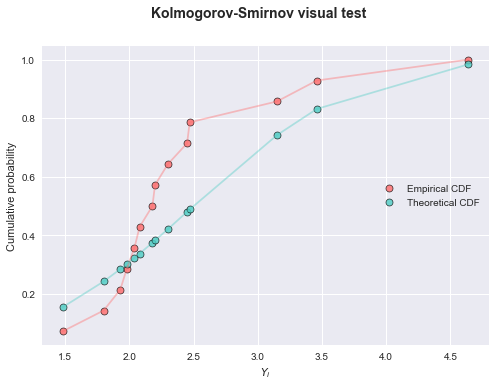

In [11]:
ks_test(Yi,mu=2.5,sigma=1) # Yi represents the data from before
plt.savefig('ksexample.png',dpi=300)

Second test

$H_0:F(Y_i)=N(100,15) \\H_1:F(Y_i)\neq N(100,15)$

In [16]:
IQ=pd.DataFrame(np.random.normal(loc=100,scale=15,size=100),
                columns=['IQ Scores'])

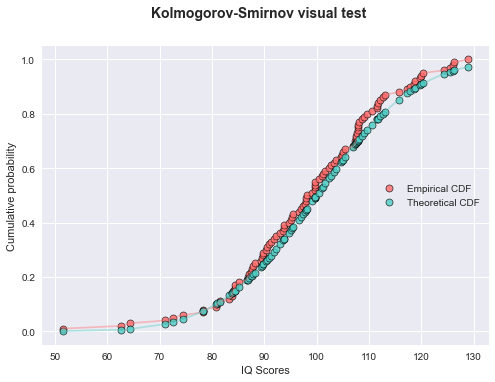

In [17]:
ks_test(IQ['IQ Scores'],mu=100,sigma=15)
plt.savefig('ksexampleci.png',dpi=300)

## Comments

- With this function you get the value of DKS but no p-values are returned. However, because the cumulative probability functions are plotted, you can get a idea of the goodness of fit of your variable to the normal distribution if the points overlap or not

- This function allows to visually check if the shape of the distribution of a variable fits the normal distribution (with the parameters that are specified), eventhough in principle the KS test allows to test goodness of fit to any distribution. However, the most common is to check if the variable of interest is normally distributed

## References

Pardo, A., Ruiz, M.A. (2015). Inferencia con una variable. In A. Pardo, M.A. Ruiz y R. San Martín (Eds.), Análisis de datos en ciencias sociales y de la salud II (pp.52-80). Editorial Síntesis.